# **Isolation Forest (IF)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving PE_Income_Spending_DataSet.csv to PE_Income_Spending_DataSet.csv


In [3]:
df=pd.read_csv('PE_Income_Spending_DataSet.csv')

In [4]:
df.describe()

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100)
count,200.000000,200.000000,200.000000
mean,38.850000,140.000000,47.690000
std,13.969007,60.717651,24.532346
min,18.000000,34.676354,0.950000
25%,28.750000,95.937913,33.012500
50%,36.000000,142.173052,47.500000
75%,49.000000,180.317041,69.350000
max,70.000000,316.710700,94.050000


In [5]:
df=pd.get_dummies(df,drop_first=True)

In [6]:
df

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male
0,19,34.676354,37.05,1
1,21,34.676354,76.95,1
2,20,36.988111,5.70,0
3,23,36.988111,73.15,0
4,31,39.299868,38.00,0
...,...,...,...,...
195,35,277.410832,75.05,0
196,45,291.281374,26.60,0
197,32,291.281374,70.30,1
198,32,316.710700,17.10,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


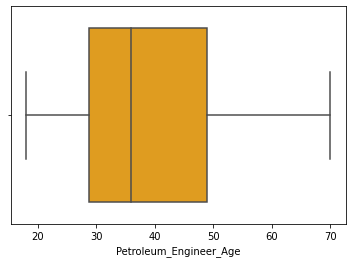

In [7]:
sns.boxplot(df['Petroleum_Engineer_Age'], color='orange')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


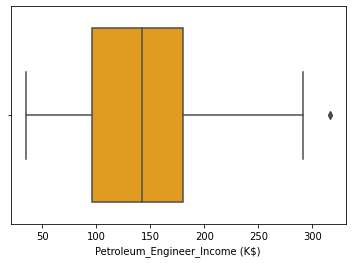

In [8]:
sns.boxplot(df['Petroleum_Engineer_Income (K$)'], color='orange')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


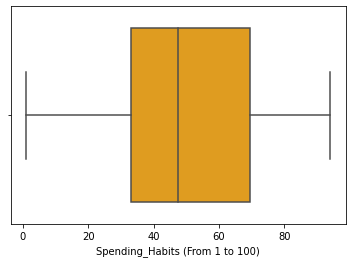

In [9]:
sns.boxplot(df['Spending_Habits (From 1 to 100)'], color='orange')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


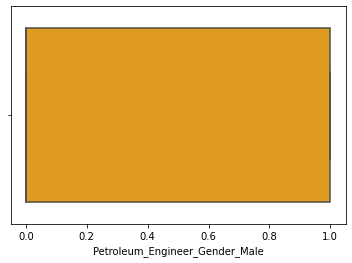

In [10]:
sns.boxplot(df['Petroleum_Engineer_Gender_Male'], color='orange')

In [11]:
df.columns

Index(['Petroleum_Engineer_Age', 'Petroleum_Engineer_Income (K$)',
       'Spending_Habits (From 1 to 100)', 'Petroleum_Engineer_Gender_Male'],
      dtype='object')

In [12]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100,max_samples=250,random_state=100, contamination=0.1) 
clf.fit(df)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (250) is greater than the total number of samples (200). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.1, max_samples=250, random_state=100)

In [13]:
df.iloc[:,:4]

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male
0,19,34.676354,37.05,1
1,21,34.676354,76.95,1
2,20,36.988111,5.70,0
3,23,36.988111,73.15,0
4,31,39.299868,38.00,0
...,...,...,...,...
195,35,277.410832,75.05,0
196,45,291.281374,26.60,0
197,32,291.281374,70.30,1
198,32,316.710700,17.10,1


Text(0.5, 1.0, 'Histogram of Average Anomaly Scores: Lower Scores = More Anomalous Samples')

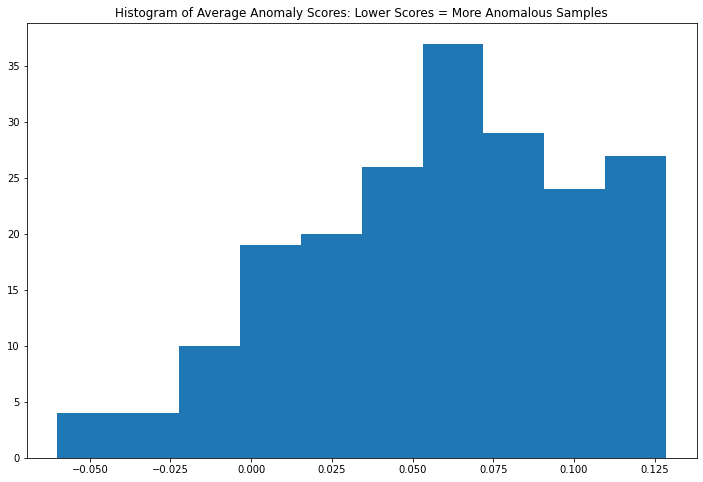

In [14]:
df['Scores']=clf.decision_function(df)
plt.figure(figsize=(12,8))
plt.hist(df['Scores'])
plt.title('Histogram of Average Anomaly Scores: Lower Scores = More Anomalous Samples')

In [15]:
df

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male,Scores
0,19,34.676354,37.05,1,-0.032601
1,21,34.676354,76.95,1,-0.004939
2,20,36.988111,5.70,0,-0.060046
3,23,36.988111,73.15,0,0.054590
4,31,39.299868,38.00,0,0.048783
...,...,...,...,...,...
195,35,277.410832,75.05,0,0.008952
196,45,291.281374,26.60,0,-0.033078
197,32,291.281374,70.30,1,0.006787
198,32,316.710700,17.10,1,-0.044971


In [16]:
df['Anomaly']=clf.predict(df.iloc[:,:4])
Anomaly=df.loc[df['Anomaly']==-1]
Anomaly_index=list(Anomaly.index)
Anomaly

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male,Scores,Anomaly
0,19,34.676354,37.05,1,-0.032601,-1
1,21,34.676354,76.95,1,-0.004939,-1
2,20,36.988111,5.70,0,-0.060046,-1
6,35,41.611625,5.70,0,-0.006933,-1
8,64,43.923382,2.85,1,-0.058308,-1
10,67,43.923382,13.30,1,-0.058579,-1
12,58,46.235139,14.25,0,-0.012855,-1
14,37,46.235139,12.35,1,-0.010101,-1
18,52,53.170410,27.55,1,-0.008263,-1
30,60,69.352708,3.80,1,-0.011495,-1


Text(0.5, 1.0, 'Isolation Forest Anomalies')

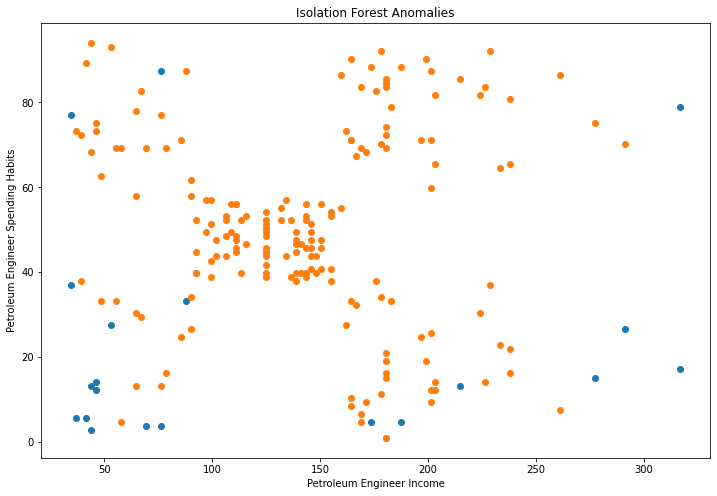

In [17]:
plt.figure(figsize=(12,8))
groups = df.groupby("Anomaly")
for name, group in groups:
    plt.plot(group['Petroleum_Engineer_Income (K$)'], group['Spending_Habits (From 1 to 100)'], marker="o", linestyle="", label=name)
plt.xlabel('Petroleum Engineer Income')
plt.ylabel('Petroleum Engineer Spending Habits')
plt.title('Isolation Forest Anomalies') 